## 6.6. Sourcing & Analysing Time Series Data

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the UK HPI data

# -----------------------------------------------------------------------------------------------------------

### 1. Importing libraries and data

In [1]:
# Importing the libraries 

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Then we create a path 

path = r'C:\Users\javis\OneDrive\Documentos\Career Foundry\2. Data Immersion\6. Advanced Analytics\UK HPI Project'

In [4]:
# We import our data, which had already been wrangled

df = pd.read_csv(os.path.join(path,'2. Data', '2.2. Prepared Data', 'HPI wrangled.csv'), index_col = False)

In [5]:
# To have a look at how it looks like

df.head()

,Unnamed: 0,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,%Change_AvgPrice_1month,%Change_AvgPrice_12months,AveragePriceSA,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
0,0,01/01/2004,Aberdeenshire,S12000034,81693.66964,40.864214,NaN,NaN,NaN,NaN,...,88436.13953,40.267250,NaN,NaN,103.0,81043.95084,40.883367,NaN,NaN,285.0
1,1,01/02/2004,Aberdeenshire,S12000034,81678.76231,40.856757,NaN,-0.018248,NaN,NaN,...,88606.44649,40.344795,0.192576,NaN,107.0,80965.29542,40.843688,-0.097053,NaN,219.0
2,2,01/03/2004,Aberdeenshire,S12000034,83525.09702,41.780317,NaN,2.260483,NaN,NaN,...,90296.91375,41.114508,1.907838,NaN,140.0,82903.23948,41.821302,2.393549,NaN,313.0
3,3,01/04/2004,Aberdeenshire,S12000034,84333.67900,42.184780,NaN,0.968071,NaN,NaN,...,90319.87844,41.124964,0.025432,NaN,180.0,84003.99161,42.376586,1.327755,NaN,391.0
4,4,01/05/2004,Aberdeenshire,S12000034,86379.95396,43.208353,NaN,2.426403,NaN,NaN,...,91989.17763,41.885039,1.848208,NaN,167.0,86222.73484,43.495852,2.641235,NaN,335.0


### 2. Subsetting, wrangling, and cleaning time-series data

#### 2.1. Subsetting data

In [6]:
# Firstly I will check missing values

df.isnull().sum()

Unnamed: 0                        0
Date                              0
RegionName                        0
AreaCode                          0
AveragePrice                      0
Index                             0
IndexSA                      130305
%Change_AvgPrice_1month         443
%Change_AvgPrice_12months      5040
AveragePriceSA               130305
SalesVolume                    4499
DetachedPrice                  6237
DetachedIndex                  6237
Detached1m%Change              6646
Detached12m%Change            11121
SemiDetachedPrice              6225
SemiDetachedIndex              6225
SemiDetached1m%Change          6634
SemiDetached12m%Change        11109
TerracedPrice                  6198
TerracedIndex                  6198
Terraced1m%Change              6607
Terraced12m%Change            11082
FlatPrice                      5901
FlatIndex                      5901
Flat1m%Change                  6311
Flat12m%Change                10797
CashPrice                   

For my time series data analysis I will be looking at 'Date', 'RegionName' and 'AveragePrice' columns, as I want to examine the evolution in price over time. For this, I will create a subset with these variables, and I will do it specifically for England.

In [7]:
# First of all, I will create a subset only for the England data

df_sub = df[df['RegionName']== 'England']

In [8]:
# Let's check the appearance of our new dataframe

df_sub.head()

,Unnamed: 0,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,%Change_AvgPrice_1month,%Change_AvgPrice_12months,AveragePriceSA,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
40350,40350,01/04/1968,England,E92000001,3408.108064,1.680067,NaN,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40351,40351,01/05/1968,England,E92000001,3408.108064,1.680067,NaN,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40352,40352,01/06/1968,England,E92000001,3408.108064,1.680067,NaN,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40353,40353,01/07/1968,England,E92000001,3524.293566,1.737342,NaN,3.409091,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40354,40354,01/08/1968,England,E92000001,3524.293566,1.737342,NaN,3.409091,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Now, we define the columns we want to include for our Time Series analysis

columns = ['Date','AveragePrice']

In [10]:
# Then I create the subset

df_england = df_sub[columns]

In [11]:
#  We check to ensure its only showing the relevant data

df_england.head()

,Date,AveragePrice
40350,01/04/1968,3408.108064
40351,01/05/1968,3408.108064
40352,01/06/1968,3408.108064
40353,01/07/1968,3524.293566
40354,01/08/1968,3524.293566


#### 2.2. Cleaning and wrangling data

In [12]:
# Now let's check for missing and duplicated values, as well as the data types and shape

df_england.shape

(645, 2)

In [13]:
df_england.dtypes

Date             object
AveragePrice    float64
dtype: object

In [14]:
# We need to change the data type of the column 'Date' to datetime in order to perform our time series analysis

df_england['Date'] = pd.to_datetime(df_england['Date'], format='%d/%m/%Y')

In [15]:
df_england.head()

,Date,AveragePrice
40350,1968-04-01,3408.108064
40351,1968-05-01,3408.108064
40352,1968-06-01,3408.108064
40353,1968-07-01,3524.293566
40354,1968-08-01,3524.293566


In [16]:
# Confirming that the change took place

df_england.dtypes

Date            datetime64[ns]
AveragePrice           float64
dtype: object

In [17]:
# Check for missing values 

df_england.isnull().sum()

Date            0
AveragePrice    0
dtype: int64

In [18]:
# Check for duplicates

dups = df_england.duplicated()
dups.sum() 

# There is no dups

0

In [19]:
# Now I am going to check the last values of our table, prior to define the data range I want to analyse.

df_england.tail()

,Date,AveragePrice
40990,2021-08-01,279872.0748
40991,2021-09-01,288828.0770
40992,2021-10-01,284026.1076
40993,2021-11-01,290037.5154
40994,2021-12-01,293339.1033


We have data all the way from April 1968 to December 2021. The fact that we have 645 rows or months, means that we have over 53 years of data, exactly the period covered betweeen 1968-2021. I was going to work initially with the whole period to see more clearly the trend of the prices, which we can presume it will be very upward seeing the first and last values, and given the nature of the market. However, it's also noticed that between 2008 and 2009 there was a substantial fall on the prices, beeing this period an isolated historical event that could bring more noise to the analysis. For this reason, and to be able to do a more current analysis, I will only use data from 2009 onwards. I won't use the data from 2021 as one of its limitations is that last year sales are not completely up to date.

The last step in the preparation for the time series analysis is make the date column being the index. I will also define the subset for our data, choosing from 2009 onwards.

In [20]:
# Now that we have the date in the right format, let's make a subset for our specific period, this is 2009-2021

df_eng_sub = df_england.loc[(df_england['Date'] >= '2009-01-01') & (df_england['Date'] <= '2020-12-01')]

In [21]:
df_eng_sub.head()

,Date,AveragePrice
40839,2009-01-01,162672.5229
40840,2009-02-01,160956.1992
40841,2009-03-01,159340.1088
40842,2009-04-01,160701.1525
40843,2009-05-01,162739.9342


In [22]:
df_eng_sub.tail()

,Date,AveragePrice
40978,2020-08-01,255801.5500
40979,2020-09-01,258154.9385
40980,2020-10-01,259591.7691
40981,2020-11-01,262409.0522
40982,2020-12-01,264971.1174


In [23]:
# After subsetting the dataframe, we have to set the "Date" column as the index

from datetime import datetime

df_eng_sub['datetime'] = pd.to_datetime(df_eng_sub['Date']) # Create a datetime column from "Date.""
df_eng_sub = df_eng_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
df_eng_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
df_eng_sub.head()

,AveragePrice
datetime,
2009-01-01,162672.5229
2009-02-01,160956.1992
2009-03-01,159340.1088
2009-04-01,160701.1525
2009-05-01,162739.9342


In [24]:
# Next, we are going to check the frequency of our index

print (df_eng_sub.index.freq)

None


In [25]:
# There is no defined frequency in our set. Let's change it to monthly, counting the first day of each month

df_eng_sub = df_eng_sub.asfreq('MS')

### 3. Line chart

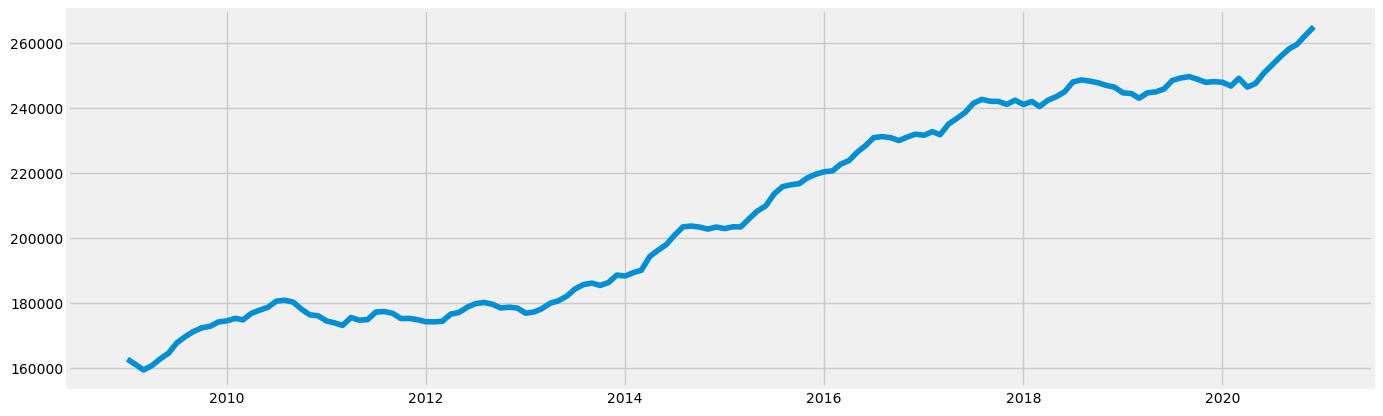

In [26]:
# To plot our new dataframe

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_eng_sub)

<Figure size 1500x500 with 0 Axes>

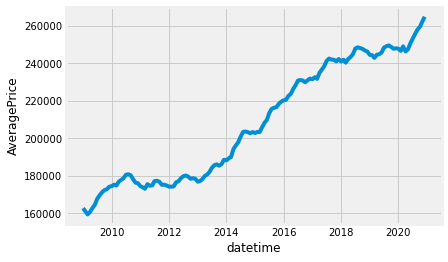

<Figure size 1500x500 with 0 Axes>

In [29]:
# A different way would be through a lineplot. We can see is much less clear but still easy to see trend.

avg_price_years = sns.lineplot(data = df_eng_sub, x = 'datetime', y = 'AveragePrice')
plt.figure(figsize=(15,5), dpi=100)

In [30]:
# To export the plot

avg_price_years.figure.savefig(os.path.join(path, '4. Analysis', 'avg_price_years_line.png'))

In [31]:
# Let's check the shape again

df_eng_sub.shape

(144, 1)

We can see clearly that our data is non-stationary, as it follows a clear ascending trend. We can also observe that there is certain seasonality involved, with the prices going slightly down after New Year and increasing towards summer. 

With 144 rows we know we have 12 years of data, exactly the period covered from 2009-2020.

### 4. Time-series analysis: decomposition

In [28]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_eng_sub, model='additive')

In [29]:
# To define a fixed size for all special charts.

from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

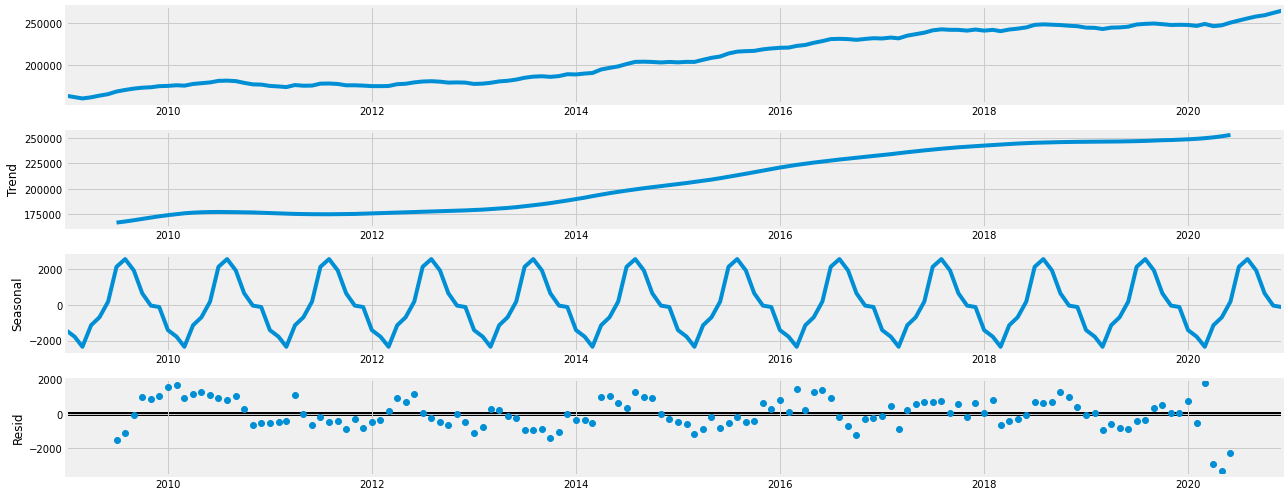

In [30]:
# Plot the separate components

decomposition.plot()
plt.show()

We can see here the 4 elements of our line chart. 
- The first one is the level, the whole data itself represented again, which will be decomposed on its 3 components.
- The second line represent the trend. In our scenario, the dominant trend is upward. As the data selected is smooth, it is a very similar line to the level.
- The seasonal line shows how our data is subjected to seasonality. Average Price has its maximum around July/August, starting to decrease all the way until February, when they begin going up again.
- The last component, the residual, shows the "noise" in the data. We can see that there is not much unexplained noise.


### 5. Testing for stationarity

In [31]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_eng_sub['AveragePrice'])

Dickey-Fuller Stationarity test:
Test Statistic                   0.884142
p-value                          0.992880
Number of Lags Used             14.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


Since the test statistic is larger than the critical value, we can’t reject the null hypothesis.
Also the p-value > 0.05, so we niw that our data is definitely non-stationary. We need to make it stationary to be able to do time series analysis and forecast.

To confirm our theory, we will also perform a test of autocorrelation

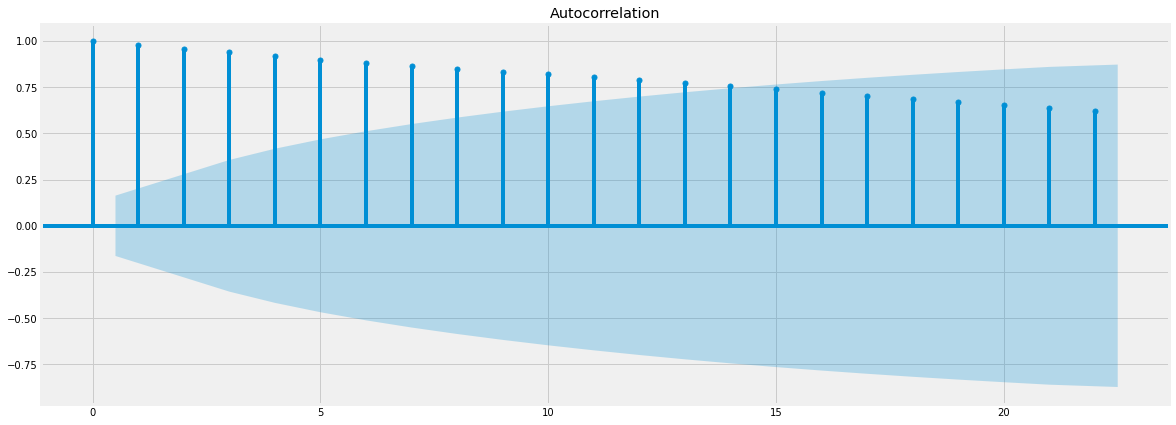

In [32]:
# To make a plot of autocorrelations, we need to import first the autocorrelation and partial correlation plots


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(df_eng_sub)
plt.show()

We have many lags that are significantly correlated with each other, as they are beyond the confidence interval, so we can also deduce from here that our data is non-stationary. 

### 6. Stationarizing our UK HPI data

We need to extract the trend of our data by removing any unnecesary variance.

In [33]:
# First we use the df.shift(1) function, which turns the observation to t-1, making the whole thing t - (t -1)

df_eng_diff = df_eng_sub - df_eng_sub.shift(1) 

In [34]:
# We need to remove the missing values that came as a result of the differencing to be able to run the Dickey-Fuller test.

df_eng_diff.dropna(inplace = True) 

In [35]:
df_eng_diff.head()

,AveragePrice
datetime,
2009-02-01,-1716.3237
2009-03-01,-1616.0904
2009-04-01,1361.0437
2009-05-01,2038.7817
2009-06-01,1795.9285


In [36]:
df_eng_diff.columns

Index(['AveragePrice'], dtype='object')

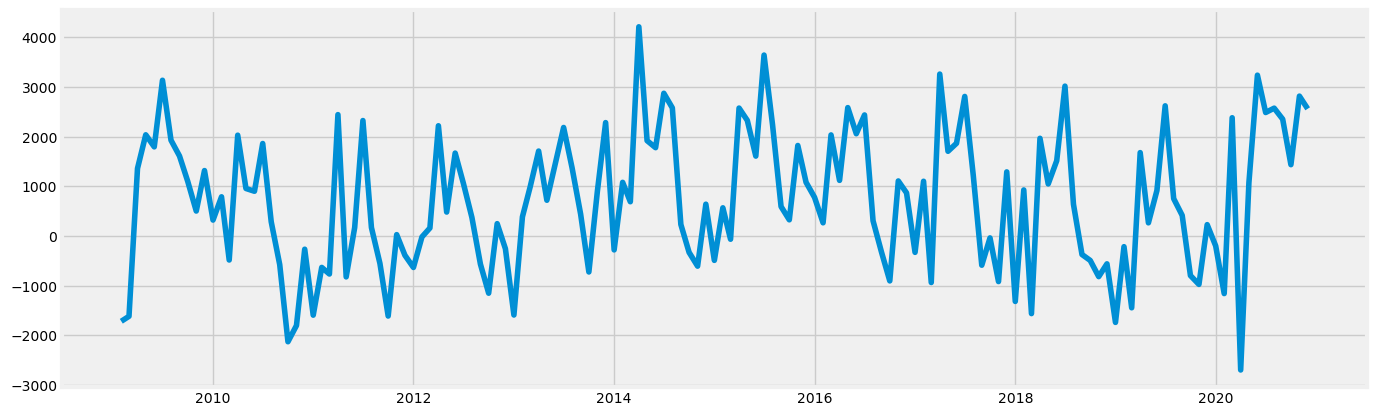

In [37]:
# To check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_eng_diff)

In [38]:
dickey_fuller(df_eng_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -2.340260
p-value                          0.159312
Number of Lags Used             14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


The Test Statistic is still bigger than our critical value at a 5%. Also the p-value > 0.05 still, so it means our data is still non stationary and we will need another round of differencing. But let's check the autocorrelation first as well.

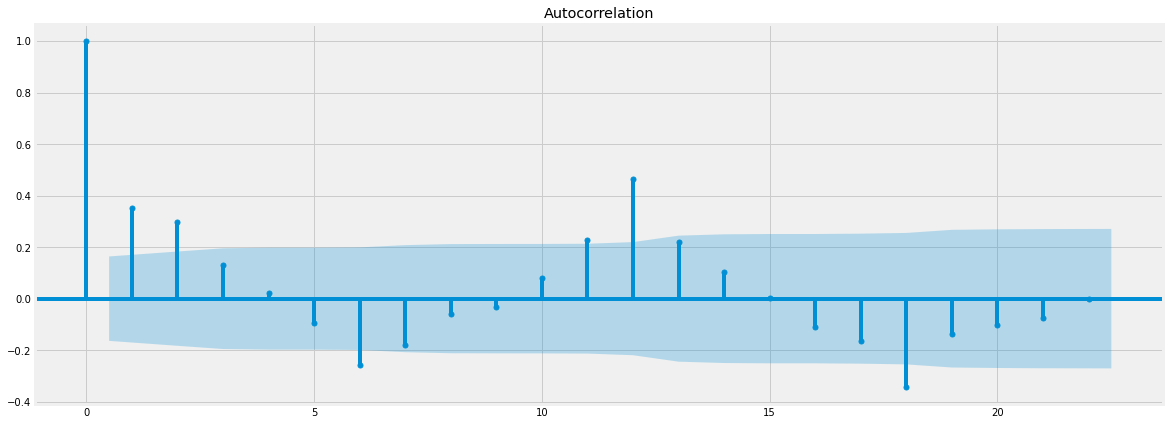

In [40]:
# To check autocorrelation

plot_acf(df_eng_diff)
plt.show()

Even though there is an improvement in the plot, as there are less autocorrelated terms, the stationarity is very weak and by our Dickie Fuller Test we now is not ready for analysis, so we will conduct another round of differencing.

In [41]:
# To turn the observation into (t-1)-(t-2)

df_eng_diff_2 = df_eng_diff - df_eng_diff.shift(1) 

In [42]:
# We need to remove the missing values that came as a result of the differencing to be able to run the Dickey-Fuller test.

df_eng_diff_2.dropna(inplace = True) 

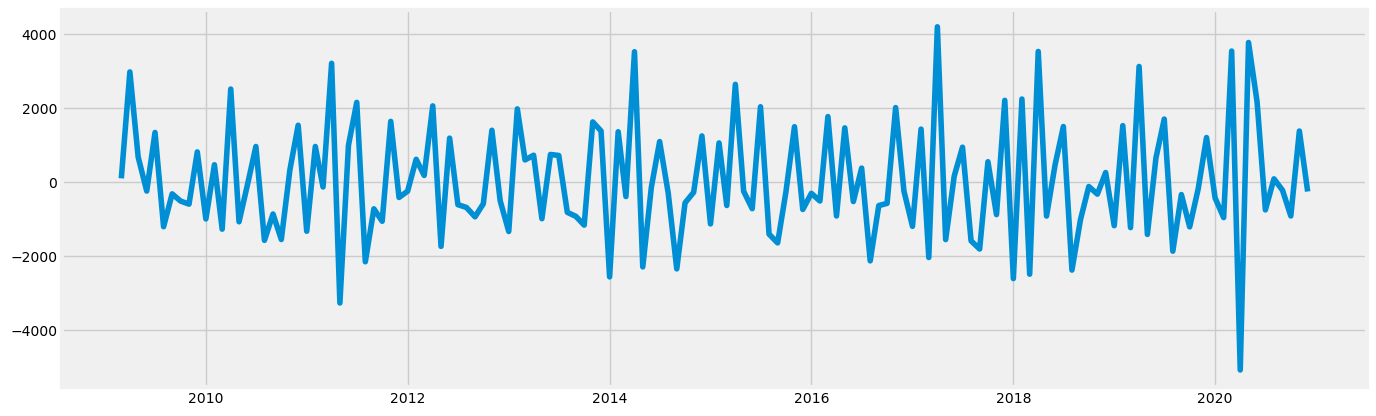

In [44]:
# To check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_eng_diff_2)

In [45]:
# Let's perform our test

dickey_fuller(df_eng_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                  -1.989441
p-value                          0.291222
Number of Lags Used             14.000000
Number of Observations Used    127.000000
Critical Value (1%)             -3.482920
Critical Value (5%)             -2.884580
Critical Value (10%)            -2.579058
dtype: float64


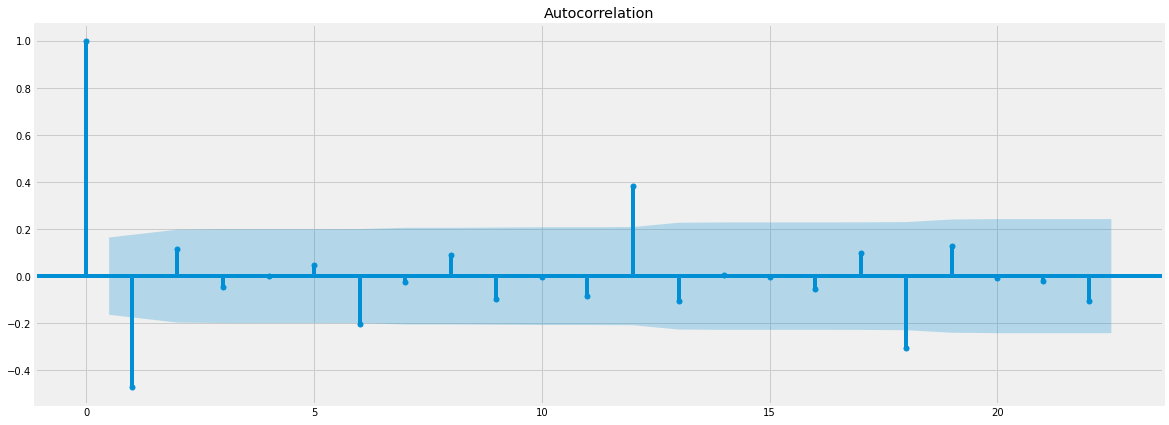

In [46]:
# To check autocorrelation

plot_acf(df_eng_diff_2)
plt.show()

The Test Statistic is now bigger than before. This could mean that we could have obtained underdifferenced data. For this reason, and for the unspoken rule of thumb of accepting a autocorrelation test if it has less thaan 10 lags outside the confidence interval, we will use the first differenced data series to perform our analyiss.

### 7. Exporting  dataframe

In [48]:
# To export our dataframe

df_eng_sub.to_pickle(os.path.join(path, '2. Data','2.2. Prepared Data', 'Average_Price_England.pkl'))